Wskaźnik newsów - GRUPA AZOTY
=========================

Notowanie
---------------

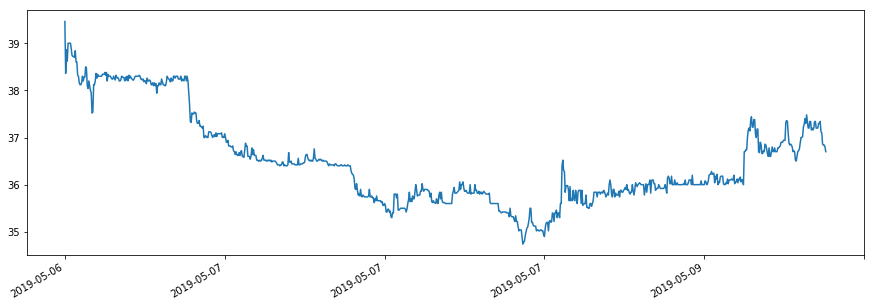

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('GRUPAAZOTY','20190512')    
ph.plot(data)                        


Analiza Twittów
----------------------

In [2]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'GRUPAAZOTY':{
                    'search': ['azoty'],
                    'ignore':['sponsor'],
                    'sentiment':{
                        'kuluary':-1,
                        'dziwny':-1,
                        'Rosjanin':-1,
                        'rosyjski':-1,                        
                        'oskarżyć':-1,
                        'lepsza':1,
                        'w ciemno':1,
                        'wielki dzień':1,
                        'kontrakt':1,
                        'umowa':1,
                        'porozumienie':1,
                        'historia':1,
                        'pierwszy':1,
                        'wpisać':1
                        }
                    }
               }

twt =  twp.indicator('GRUPAAZOTY','20190512')
for t in twt:
    if not t.ignore and t.power>100000 and t.sentiment==0:
        print('==========================================')
        print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date) +' ' + t.text)


186676 [] 2019-05-11 17:13:13 Jarosław Kaczyński na otworzyć projekt polimer Police : `` Dobra zmiana to szansa także dla polski przemysł '' https : //t.co/YLD2y8pfzO # GrupaAzoty # polimer # Police # Kaczyński # PiS @ Grupa_Azoty 
112823 [] 2019-05-11 17:12:08 Jarosław Kaczyński komentować porozumieć grupa azot z hyundai engineering : `` Ta inwestycja to Początek coś bardzo Ważny '' https : //t.co/UrIcg6CdHY 
160283 [] 2019-05-11 16:36:17 Jarosław Kaczyński komentować porozumieć grupa azot z hyundai engineering : `` Ta inwestycja to Początek coś bardzo Ważny '' https : //t.co/UrIcg6CdHY 
137230 ['rosyjski', 'w ciemno'] 2019-05-11 09:56:32 BZ WBK kierować przez @ Morawiecki pośredniczyć w sprzedaż azot rosyjski spółka . wspierać tężyć ten spółka otwarty kredyt . każdy dzień premiera przedstawić się wyznawca @ pisorgpl jaka wielki , polski patriota , ą on w ciemno to kupować . https : //t.co/lWbklsyQVc 
215733 ['rosyjski', 'w ciemno'] 2019-05-11 04:57:35 BZ WBK kierować przez @ Morawiec

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

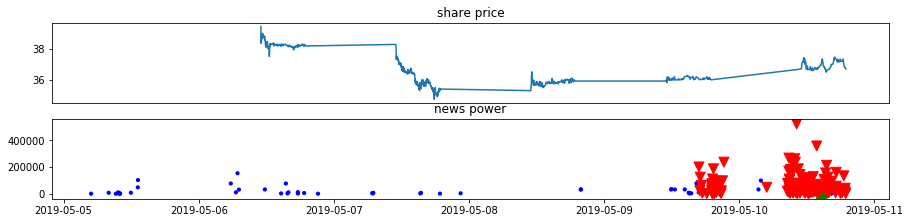

In [5]:
import plot_helper 
plot_helper.plot2(data,twt)